In [16]:
from tensorflow import keras
from scipy import special
import scipy
import numpy as np
import numpy as np
import matplotlib.pyplot as plt

In [17]:
(train_data, train_label), (test_data, test_label) = keras.datasets.mnist.load_data()

In [18]:
print('Train data: ' + str(train_data.shape))
print('Train labels: ' + str(train_label.shape))
print('Test data:  '  + str(test_data.shape))
print('Test labels:  '  + str(test_label.shape))

Train data: (60000, 28, 28)
Train labels: (60000,)
Test data:  (10000, 28, 28)
Test labels:  (10000,)


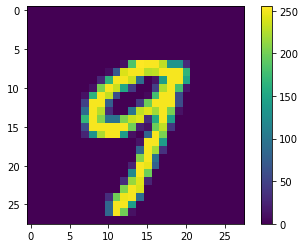

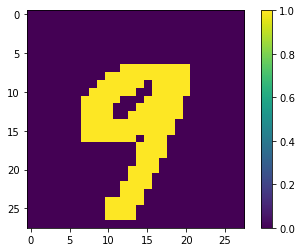

In [19]:
plt.imshow(train_data[45])
plt.colorbar()
plt.show()
plt.imshow(train_data[45] > 0)
plt.colorbar()
plt.show()

In [20]:
print(train_label[45])

9


In [21]:
train_label_vector = np.array([[int(j == i) for j in range(10)] for i in train_label])
print(train_label_vector[45])

[0 0 0 0 0 0 0 0 0 1]


In [26]:
w_i_h = np.random.uniform(-0.5, 0.5, (20, 784)) #weight input hidden
w_h_o = np.random.uniform(-0.5, 0.5, (10, 20)) #wheight hidden output
b_i_h = np.zeros((20, 1)) # bias input hidden
b_h_o = np.zeros((10, 1)) #bias hidden output

lr = 0.05 #learning rate
nr_correct = 0
epochs = 3
#train_data = train_data > 0
train_data = train_data.reshape((60000, 28*28,1))
train_data = train_data > 0
train_label_vector = train_label_vector.reshape((60000,10,1))
for epoch in range(epochs):
    for img, l in zip(train_data, train_label_vector):
        h_pre = b_i_h + w_i_h @ img
        h = 1 / (1 + np.exp(-h_pre))
        o_pre = b_h_o + w_h_o @ h
        o = 1 / (1 + np.exp(-o_pre))
        e = 1 / len(o) * np.sum((o - l) ** 2, axis=0)
        nr_correct += int(np.argmax(o) == np.argmax(l))
        delta_o = o - l
        w_h_o += -lr * delta_o @ np.transpose(h)
        b_h_o += -lr * delta_o
        # Backpropagation hidden -> input (activation function derivative)
        delta_h = np.transpose(w_h_o) @ delta_o * (h * (1 - h))
        w_i_h += -lr * delta_h @ np.transpose(img)
        b_i_h += -lr * delta_h
    print(f"Acc: {round((nr_correct / train_data.shape[0]) * 100, 2)}%")
    nr_correct = 0

Acc: 88.59%
Acc: 91.75%
Acc: 92.45%


In [ ]:
while True:
    index = int(input("Introduzca un número en este rango (0 - 10000): "))
    img = test_data[index]
    plt.imshow(img.reshape(28, 28))
    # Forward propagation input -> hidden
    h_pre = b_i_h + w_i_h @ img.reshape(784, 1)
    h = 1 / (1 + np.exp(-h_pre))
    # Forward propagation hidden -> output
    o_pre = b_h_o + w_h_o @ h
    o = 1 / (1 + np.exp(-o_pre))

    plt.title(f"Result is: {o.argmax()}")
    plt.show()